Warning message:
"package 'ISLR' was built under R version 4.4.1"


[1]   64 6830

[1] "CNS"   "CNS"   "CNS"   "RENAL"

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

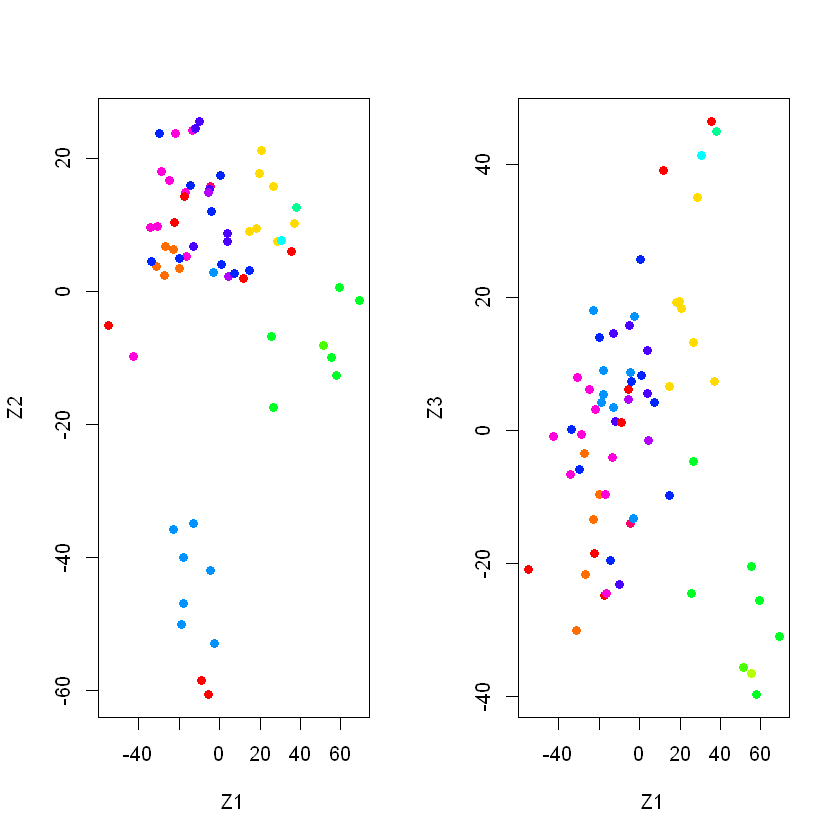

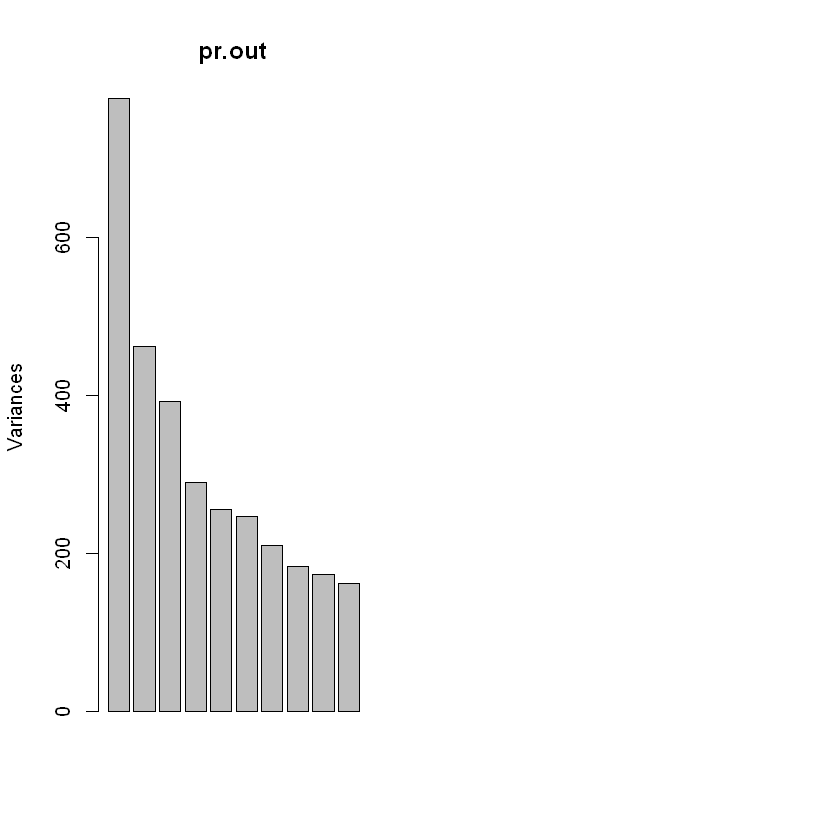

ERROR: Error in eval(expr, envir, enclos): object 'hc.out' not found


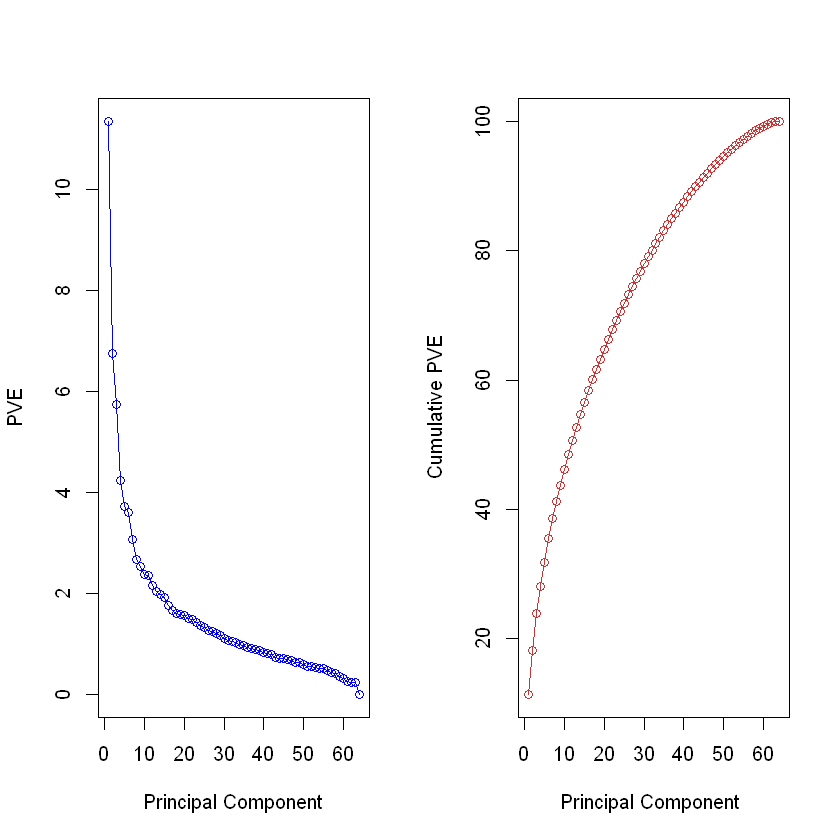

In [1]:
library(ISLR)
nci.labs=NCI60$labs
nci.data=NCI60$data
dim(nci.data)
nci.labs[1:4]
table(nci.labs)
#PCA on the NCI60 Data
pr.out=prcomp(nci.data , scale=TRUE)
Cols=function (vec){
  cols=rainbow (length(unique(vec)))
  return(cols[as.numeric (as.factor(vec))])
}

par(mfrow=c(1,2))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19, xlab="Z1",ylab="Z2")
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19, xlab="Z1",ylab="Z3")
summary(pr.out)
plot(pr.out)
pve =100*pr.out$sdev ^2/sum(pr.out$sdev ^2)
par(mfrow=c(1,2))
plot(pve , type="o", ylab="PVE", xlab=" Principal Component ", col="blue")
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component ", col="brown3")
par(mfrow=c(1,1))
plot(hc.out , labels =nci.labs)
abline(h=139, col="red")
hc.out
set.seed(2)
km.out=kmeans(sd.data , 4, nstart =20)
km.clusters =km.out$cluster
table(km.clusters ,hc.clusters)
hc.out=hclust(dist(pr.out$x [,1:5]) )
plot(hc.out , labels =nci.labs , main="Hier. Clust. on First Five Score Vectors ")
table(cutree(hc.out ,4), nci.labs)